In [2]:
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Explainability
import shap

# Utilities
import warnings
warnings.filterwarnings("ignore")

# Reproducibility
RANDOM_STATE = 42


c:\Users\NIMISH\Desktop\Carbon_Emission_per_capita\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
co2_df = pd.read_csv("../data/owid-co2-data.csv")
energy_df = pd.read_csv("../data/owid-energy-data.csv")

print("CO2 dataset shape:", co2_df.shape)
print("Energy dataset shape:", energy_df.shape)

CO2 dataset shape: (50411, 79)
Energy dataset shape: (23195, 130)


In [4]:
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [6]:
print("CO2 columns:")
print(co2_df.columns.tolist())

print("\nEnergy columns:")
print(energy_df.columns.tolist())

CO2 columns:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_

In [7]:
# Filter for India
co2_india = co2_df[co2_df["country"] == "India"].copy()
energy_india = energy_df[energy_df["country"] == "India"].copy()

print("CO2 India shape:", co2_india.shape)
print("Energy India shape:", energy_india.shape)

CO2 India shape: (175, 79)
Energy India shape: (125, 130)


In [8]:
co2_india = co2_india.sort_values("year").reset_index(drop=True)
energy_india = energy_india.sort_values("year").reset_index(drop=True)

In [9]:
co2_years = set(co2_india["year"])
energy_years = set(energy_india["year"])

common_years = sorted(co2_years.intersection(energy_years))

print("Common year range:", min(common_years), "-", max(common_years))
print("Number of common years:", len(common_years))


Common year range: 1900 - 2024
Number of common years: 125


In [10]:
co2_india = co2_india[co2_india["year"].isin(common_years)].reset_index(drop=True)
energy_india = energy_india[energy_india["year"].isin(common_years)].reset_index(drop=True)

print("Aligned CO2 shape:", co2_india.shape)
print("Aligned Energy shape:", energy_india.shape)


Aligned CO2 shape: (125, 79)
Aligned Energy shape: (125, 130)


In [11]:
assert all(co2_india["year"].values == energy_india["year"].values)

In [12]:
energy_features = [
    "year",
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

energy_india_final = energy_india[energy_features].copy()

co2_india_final = co2_india[['co2_per_capita', 'year']].copy()

co2_india_final.head(), energy_india_final.head()


(   co2_per_capita  year
 0           0.042  1900
 1           0.047  1901
 2           0.051  1902
 3           0.052  1903
 4           0.058  1904,
    year  energy_per_capita  fossil_energy_per_capita  renewables_share_energy  \
 0  1900                NaN                       NaN                      NaN   
 1  1901                NaN                       NaN                      NaN   
 2  1902                NaN                       NaN                      NaN   
 3  1903                NaN                       NaN                      NaN   
 4  1904                NaN                       NaN                      NaN   
 
    energy_per_gdp  
 0             NaN  
 1             NaN  
 2             NaN  
 3             NaN  
 4             NaN  )

# data cleaning

In [13]:
energy_india_final.isna().sum()

year                         0
energy_per_capita           65
fossil_energy_per_capita    65
renewables_share_energy     65
energy_per_gdp              67
dtype: int64

In [14]:
energy_india_final.dropna(inplace=True)
energy_india_final.info()


<class 'pandas.DataFrame'>
RangeIndex: 58 entries, 65 to 122
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      58 non-null     int64  
 1   energy_per_capita         58 non-null     float64
 2   fossil_energy_per_capita  58 non-null     float64
 3   renewables_share_energy   58 non-null     float64
 4   energy_per_gdp            58 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4 KB


In [15]:
co2_india_final.isna().sum()

co2_per_capita    0
year              0
dtype: int64

In [16]:
co2_india_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   co2_per_capita  125 non-null    float64
 1   year            125 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [17]:
drivers = [
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

energy_india_final.head()

,year,energy_per_capita,fossil_energy_per_capita,renewables_share_energy,energy_per_gdp
65,1965,1263.825,1148.192,8.643,1.039
66,1966,1274.940,1156.744,8.758,1.062
67,1967,1286.993,1157.539,9.507,1.012
68,1968,1346.781,1200.554,10.267,1.054
69,1969,1461.818,1299.008,10.283,1.095


In [18]:
from sklearn.linear_model import LinearRegression

X_year = energy_india_final[['year']]

driver_models = {}                 
driver_predictions = pd.DataFrame({
    "year": energy_india_final["year"]
})

In [19]:
for driver in drivers:
    y = energy_india_final[driver]
    
    model = LinearRegression()
    model.fit(X_year, y)
    
    # Save model
    driver_models[driver] = model
    
    # Predict on historical years (sanity check)
    driver_predictions[driver] = model.predict(X_year)


In [20]:
for driver, model in driver_models.items():
    print(
        f"{driver}: "
        f"coefficient={model.coef_[0]:.4f}, "
        f"intercept={model.intercept_:.2f}"
    )

energy_per_capita: coefficient=101.0371, intercept=-198105.35
fossil_energy_per_capita: coefficient=93.2602, intercept=-182906.36
renewables_share_energy: coefficient=-0.0883, intercept=184.56
energy_per_gdp: coefficient=-0.0005, intercept=2.23


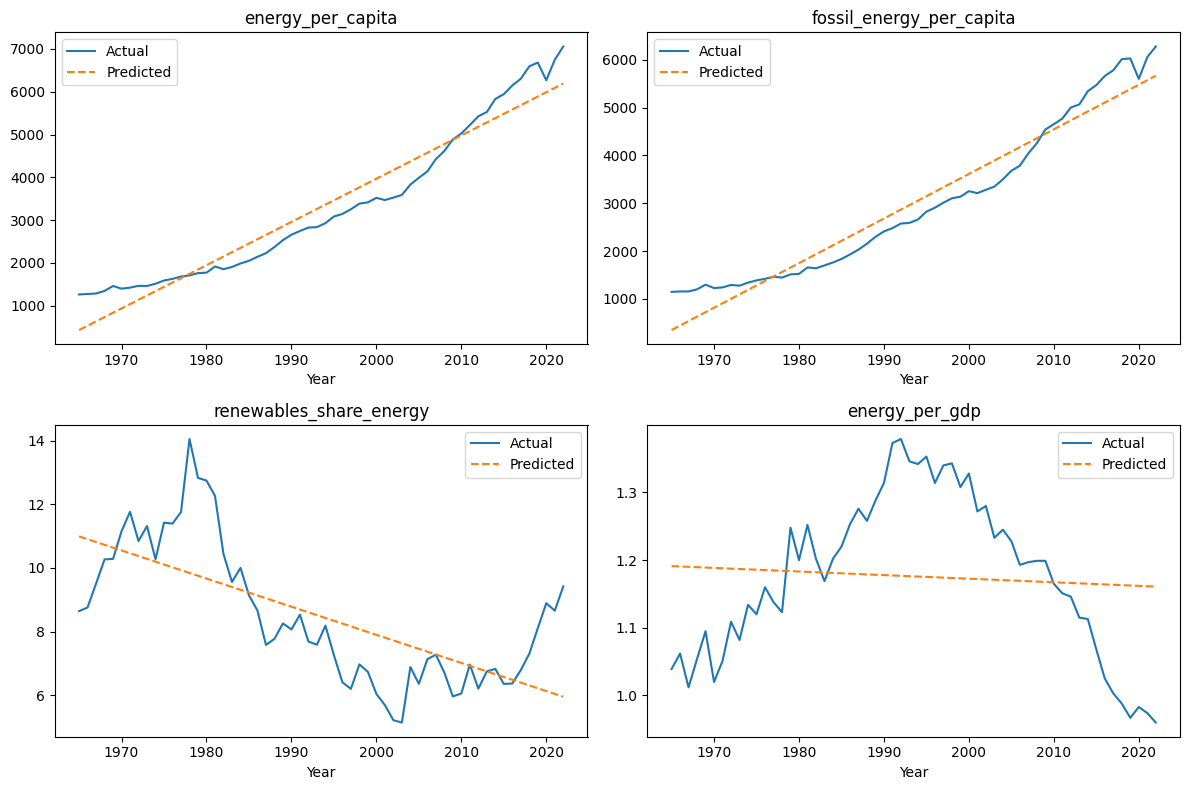

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, driver in zip(axes, drivers):
    ax.plot(
        energy_india_final["year"],
        energy_india_final[driver],
        label="Actual"
    )
    ax.plot(
        driver_predictions["year"],
        driver_predictions[driver],
        linestyle="--",
        label="Predicted"
    )
    ax.set_title(driver)
    ax.set_xlabel("Year")
    ax.legend()

plt.tight_layout()
plt.show()

In [22]:
import joblib

joblib.dump(driver_models, "driver_models.pkl")

['driver_models.pkl']

In [23]:
# Get years where drivers are available
valid_years = set(energy_india_final["year"])

co2_aligned_df = co2_india_final[
    co2_india_final["year"].isin(valid_years)
][["year", "co2_per_capita"]].reset_index(drop=True)

print("CO2 aligned shape:", co2_aligned_df.shape)
co2_aligned_df.head()


CO2 aligned shape: (58, 2)


,year,co2_per_capita
0,1965,0.314
1,1966,0.318
2,1967,0.312
3,1968,0.333
4,1969,0.332


In [25]:
model_df = energy_india_final.merge(
    co2_aligned_df,
    on="year",
    how="inner"
)

print("Final modeling shape:", model_df.shape)
model_df.head()

Final modeling shape: (58, 6)


,year,energy_per_capita,fossil_energy_per_capita,renewables_share_energy,energy_per_gdp,co2_per_capita
0,1965,1263.825,1148.192,8.643,1.039,0.314
1,1966,1274.940,1156.744,8.758,1.062,0.318
2,1967,1286.993,1157.539,9.507,1.012,0.312
3,1968,1346.781,1200.554,10.267,1.054,0.333
4,1969,1461.818,1299.008,10.283,1.095,0.332


In [26]:
features = [
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

X = model_df[features]
y = model_df["co2_per_capita"]

In [27]:
split_idx = int(len(model_df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (46, 4)
Test size : (12, 4)


In [28]:
from sklearn.linear_model import ElasticNet

co2_model = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    random_state=42
)

co2_model.fit(X_train, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.1
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = co2_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE : 0.084
RMSE: 0.089


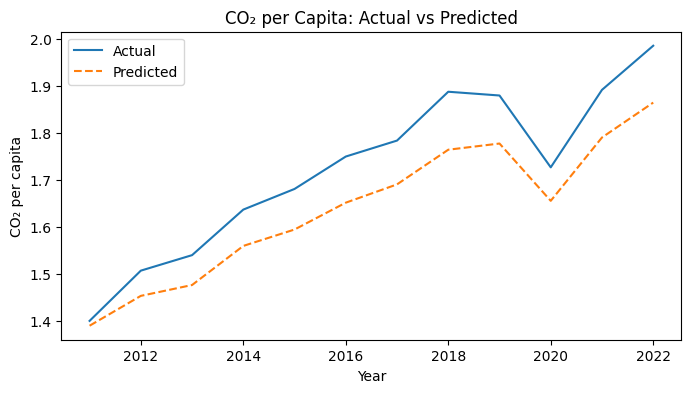

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(model_df["year"].iloc[split_idx:], y_test.values, label="Actual")
plt.plot(model_df["year"].iloc[split_idx:], y_pred, label="Predicted", linestyle="--")
plt.xlabel("Year")
plt.ylabel("CO₂ per capita")
plt.title("CO₂ per Capita: Actual vs Predicted")
plt.legend()
plt.show()


In [31]:
import joblib

joblib.dump(co2_model, "co2_model.pkl")


['co2_model.pkl']

In [32]:
explainer = shap.Explainer(co2_model, X_train)

In [33]:
shap_values = explainer(X_test)

shap_values


.values =
array([[ 0.31605209,  0.41469119, -0.        , -0.        ],
       [ 0.34026917,  0.4540527 , -0.        , -0.        ],
       [ 0.35243854,  0.46499045, -0.        , -0.        ],
       [ 0.38868056,  0.51202449, -0.        , -0.        ],
       [ 0.40196583,  0.53366325, -0.        , -0.        ],
       [ 0.42643839,  0.56636007, -0.        , -0.        ],
       [ 0.44505354,  0.58670183, -0.        , -0.        ],
       [ 0.47950887,  0.62606964, -0.        , -0.        ],
       [ 0.49011185,  0.62863963, -0.        , -0.        ],
       [ 0.44077754,  0.55592931,  0.        , -0.        ],
       [ 0.49813761,  0.63346868, -0.        , -0.        ],
       [ 0.53485278,  0.67108629,  0.        , -0.        ]])

.base_values =
array([0.65895652, 0.65895652, 0.65895652, 0.65895652, 0.65895652,
       0.65895652, 0.65895652, 0.65895652, 0.65895652, 0.65895652,
       0.65895652, 0.65895652])

.data =
array([[5.222708e+03, 4.771146e+03, 6.967000e+00, 1.151000e+00],
 

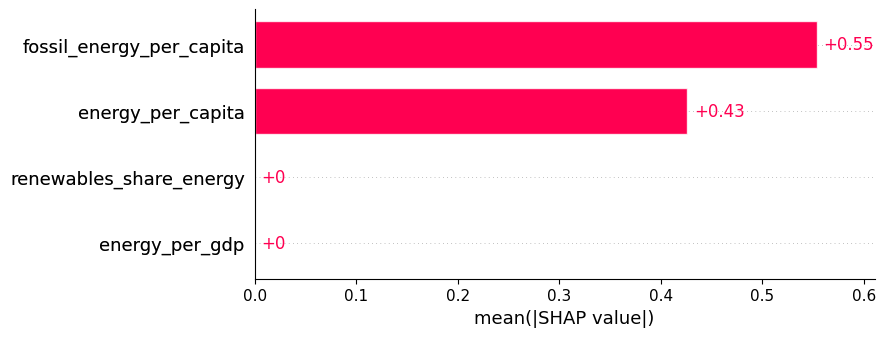

In [34]:
shap.plots.bar(shap_values)

In [35]:
def predict_drivers_for_year(year, driver_models):
    """
    Predict energy drivers for a given year using trained driver models.
    """
    year_df = pd.DataFrame({"year": [year]})
    
    drivers_pred = {}
    for driver, model in driver_models.items():
        drivers_pred[driver] = float(model.predict(year_df)[0])
    
    return drivers_pred


In [36]:
def predict_co2_from_drivers(drivers_pred, co2_model):
    """
    Predict CO₂ per capita from projected drivers.
    """
    X = pd.DataFrame([drivers_pred])
    co2_pred = float(co2_model.predict(X)[0])
    return co2_pred, X


In [37]:
def compute_shap_contributions(X, explainer, feature_names):
    """
    Compute SHAP contributions for a single prediction.
    """
    shap_values = explainer(X)
    
    contributions = {
        feature: float(shap_values.values[0][i])
        for i, feature in enumerate(feature_names)
    }
    
    base_value = float(shap_values.base_values[0])
    
    return contributions, base_value


In [38]:
def predict_co2_for_year(
    year,
    driver_models,
    co2_model,
    explainer,
    feature_names
):
    """
    End-to-end prediction:
    year → drivers → CO₂ → factor contributions
    """
    # 1. Predict drivers
    drivers_pred = predict_drivers_for_year(year, driver_models)
    
    # 2. Predict CO₂
    co2_pred, X = predict_co2_from_drivers(drivers_pred, co2_model)
    
    # 3. Explain prediction
    contributions, base_value = compute_shap_contributions(
        X, explainer, feature_names
    )
    
    # 4. Package output
    result = {
        "year": year,
        "predicted_co2_per_capita": co2_pred,
        "baseline_co2": base_value,
        "projected_drivers": drivers_pred,
        "factor_contributions": contributions
    }
    
    return result


In [39]:
feature_names = features  # from Section 6

result = predict_co2_for_year(
    year=2030,
    driver_models=driver_models,
    co2_model=co2_model,
    explainer=explainer,
    feature_names=feature_names
)

result


{'year': 2030,
 'predicted_co2_per_capita': 1.8809203064331035,
 'baseline_co2': 0.6589565217391304,
 'projected_drivers': {'energy_per_capita': 7000.00498769572,
  'fossil_energy_per_capita': 6411.930137131247,
  'renewables_share_energy': 5.2489831123688475,
  'energy_per_gdp': 1.1567053431357466},
 'factor_contributions': {'energy_per_capita': 0.5280326054409744,
  'fossil_energy_per_capita': 0.6939311792529984,
  'renewables_share_energy': -0.0,
  'energy_per_gdp': -0.0}}